In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
from plotting import *
from filtering import *

In [ ]:
# load data from steinmetz dir

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)

alldat = np.array([])
for j in fname[0:3]:
  alldat = np.hstack((alldat, np.load(j, allow_pickle=True)['dat']))

In [ ]:
# recording index and number of neurons for a region in that recording
region = 'VISp'
recordings_with_region(alldat, region)

array([[  0, 178],
       [  2, 114],
       [  3,  39],
       [  7,  48],
       [  9, 105],
       [ 11,  66],
       [ 13,  42],
       [ 19, 122],
       [ 21, 133],
       [ 24,  94],
       [ 25, 162],
       [ 38,  15]])

In [ ]:
# get trials with full contrast only on the right side, or the left side

full_right, full_right_idx = filter_contralateral_trials_full_contrast(alldat, region, c_left=0, c_right=1)
full_left, full_left_idx = filter_contralateral_trials_full_contrast(alldat, region, c_left=1, c_right=0)

print("full contrast right")
for recording in full_right:
    regions, counts = np.unique(recording[2], return_counts=True)
    print(list(zip(regions, counts)))

print("full contrast left")
for recording in full_left:
    regions, counts = np.unique(recording[2], return_counts=True)
    print(list(zip(regions, counts)))

full contrast right
[('VISp', 178)]
[('VISp', 114)]
[('VISp', 39)]
[('VISp', 48)]
[('VISp', 105)]
[('VISp', 66)]
[('VISp', 42)]
[('VISp', 122)]
[('VISp', 133)]
[('VISp', 94)]
[('VISp', 162)]
[('VISp', 15)]
full contrast left
[('VISp', 178)]
[('VISp', 114)]
[('VISp', 39)]
[('VISp', 48)]
[('VISp', 105)]
[('VISp', 66)]
[('VISp', 42)]
[('VISp', 122)]
[('VISp', 133)]
[('VISp', 94)]
[('VISp', 162)]
[('VISp', 15)]
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
# get all neurons/trials for a given region

filtered_alldat, filtered_alldat_idx = filter_contralateral_trials_full_contrast(alldat, region)
# data structure:
# 0: mouse_name
# 1: mouse_spikes
# 2: mouse_regions
# 3: mouse_gocue
# 4: mouse_resptime
# 5: mouse_wheel
# 6: mouse_feedback
# 7: mouse_response

print("regions and number of neurons:")
for recording in filtered_alldat:
    regions, counts = np.unique(recording[2], return_counts=True)
    print(list(zip(regions, counts)))

print("(neurons, trials, time bins):")
for recording in filtered_alldat:
    print(recording[1].shape)

regions and number of neurons:
[('VISp', 178)]
[('VISp', 114)]
[('VISp', 39)]
[('VISp', 48)]
[('VISp', 105)]
[('VISp', 66)]
[('VISp', 42)]
[('VISp', 122)]
[('VISp', 133)]
[('VISp', 94)]
[('VISp', 162)]
[('VISp', 15)]
(neurons, trials, time bins):
(178, 21, 250)
(114, 34, 250)
(39, 14, 250)
(48, 31, 250)
(105, 37, 250)
(66, 35, 250)
(42, 17, 250)
(122, 12, 250)
(133, 39, 250)
(94, 32, 250)
(162, 22, 250)
(15, 26, 250)


In [ ]:
print(full_right[0][1].shape)
print(np.hstack(full_right[0][1][:,:,:150]).shape)

(178, 21, 250)
(21, 26700)


In [ ]:
# look at the data for one recording from the filtered data in the previous cell

# data structure:
# 0: mouse_name
# 1: mouse_spikes
# 2: mouse_regions
# 3: mouse_gocue
# 4: mouse_resptime
# 5: mouse_wheel
# 6: mouse_feedback
# 7: mouse_response

recording = filtered_alldat[0]

print(f"mouse name: {recording[0]}")
print(f"spikes data shape: {recording[1].shape}")
print(f"regions in filtered data: {np.unique(recording[2])[0]}")

mouse name: Cori
spikes data shape: (178, 21, 250)
regions in filtered data: VISp


In [ ]:
# combine data from all trials for each recording
combined_spks = []
combined_rsps = []
combined_rgs = []
for recording in filtered_alldat:
    combined_spks.append(recording[1])
    combined_rsps.append(recording[7])
    combined_rgs.append(recording[2])
combined_spks = np.asarray(combined_spks)
combined_rsps = np.asarray(combined_rsps)
combined_rgs = np.asarray(combined_rgs)

# stack all trials togethers
combined_neurons = []
for dts in combined_spks:
    combined_neurons.append(np.vstack(dts))
combined_neurons = np.asarray(combined_neurons)

combined_responses = []
combined_regions = []
for i, rsp in enumerate(combined_rsps):
    neuron_count = combined_spks[i].shape[0]
    ext_rsps = np.tile(np.vstack(rsp), neuron_count)
    combined_responses.append(np.hstack(np.vstack(ext_rsps).T))
    
    trial_count = combined_spks[i].shape[1]
    ext_regions = np.tile(np.vstack(combined_rgs[i]), trial_count)
    combined_regions.append(np.hstack(np.vstack(ext_regions).T))
    
combined_responses = np.asarray(combined_responses)
combined_regions = np.asarray(combined_regions)


print(f"regions in combined data: {np.unique(np.hstack(combined_regions))}")
print(f"shape of combined_neurons: {combined_neurons.shape}")
print(f"shape of combined_responses: {combined_responses.shape}")

regions in combined data: ['VISp']
shape of combined_neurons: (12,)
shape of combined_responses: (12,)
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


total neurons: 698
VISp neurons: 66
trials: 340


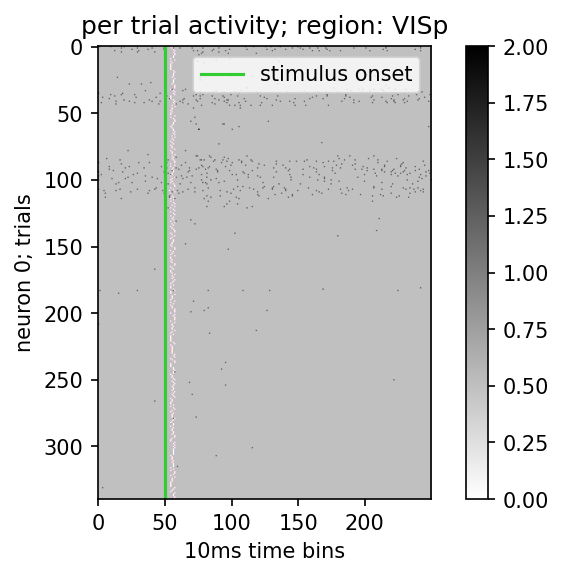

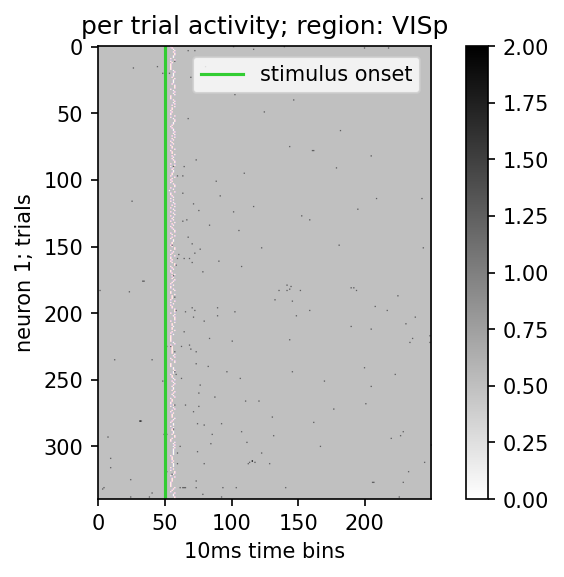

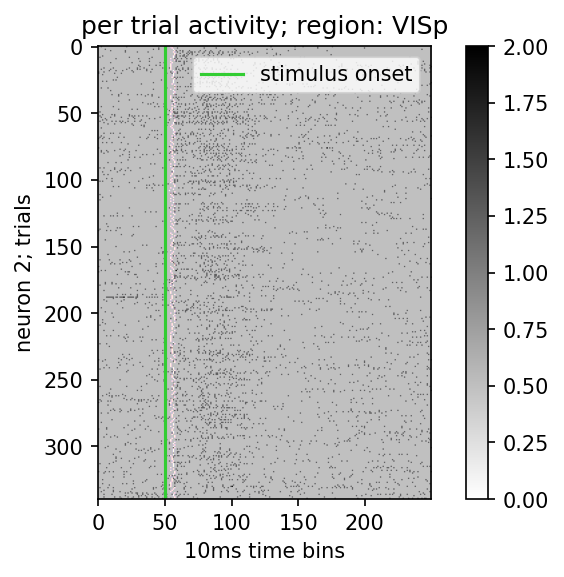

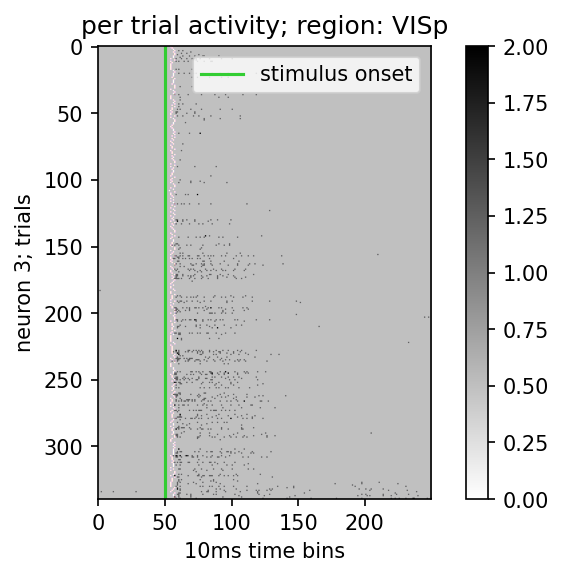

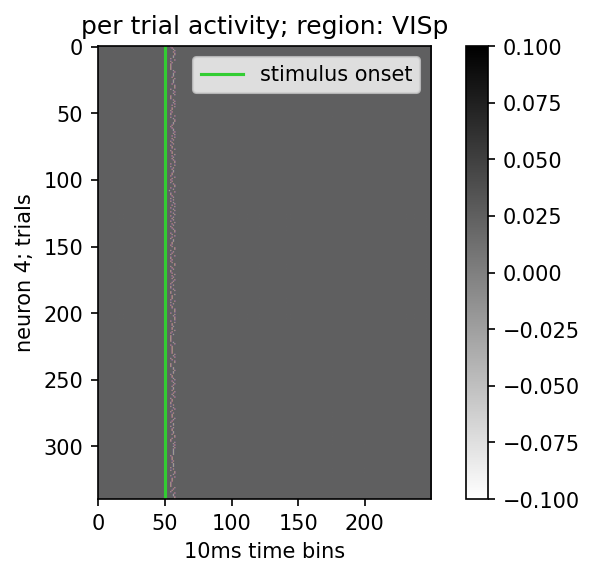

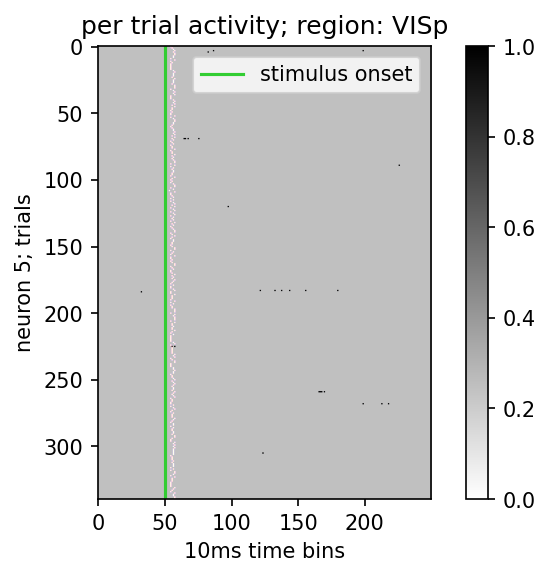

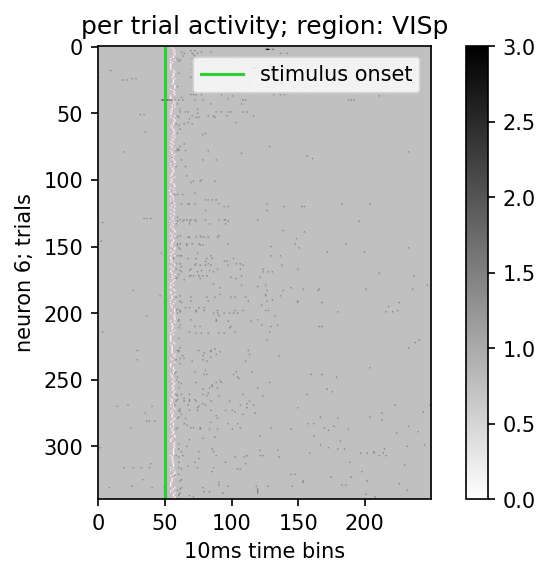

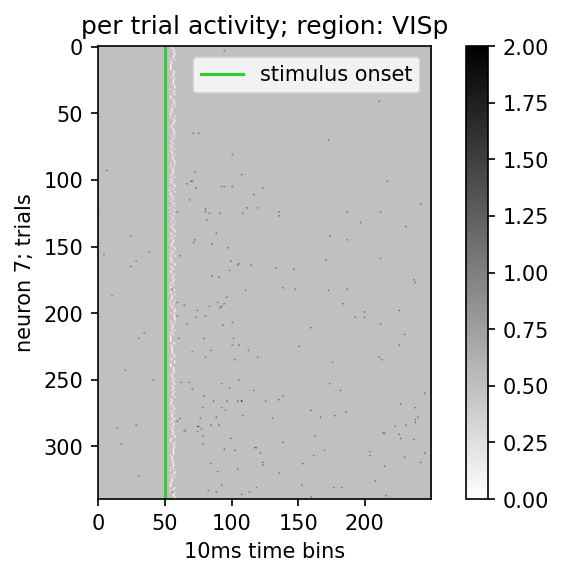

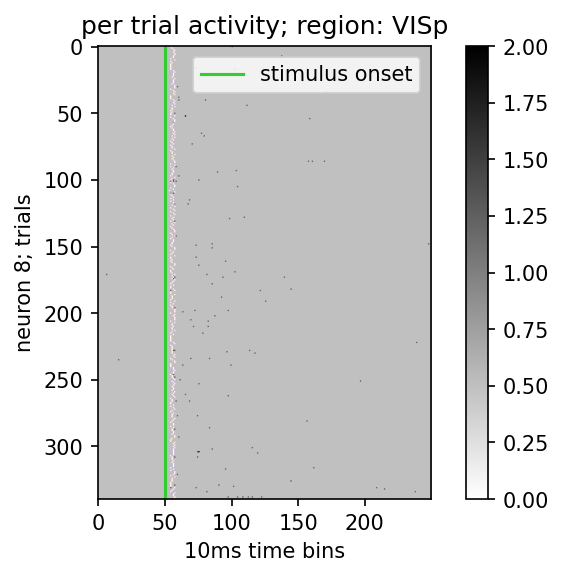

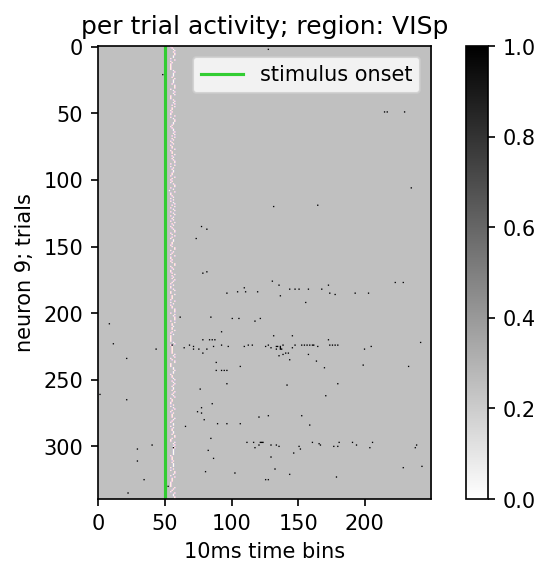

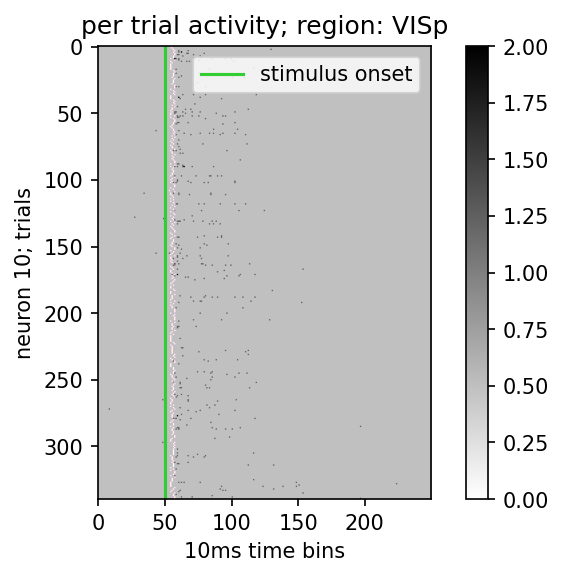

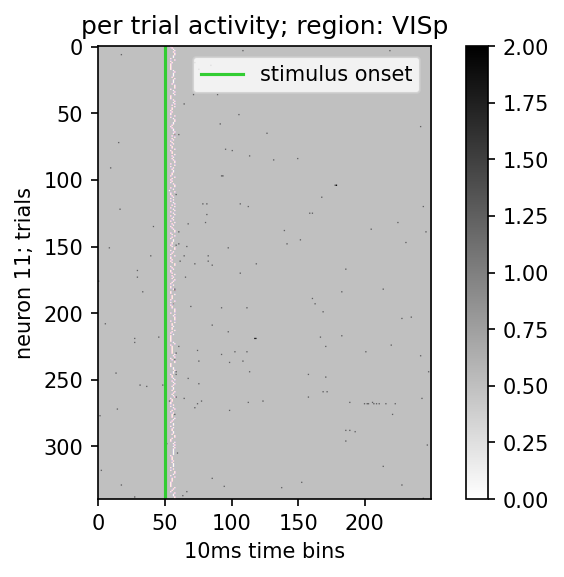

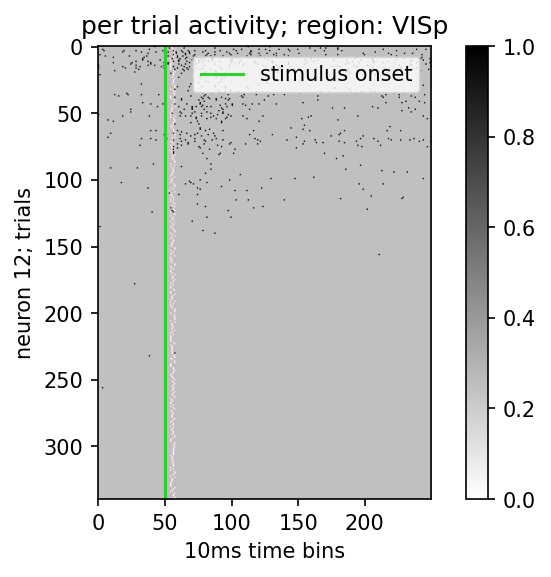

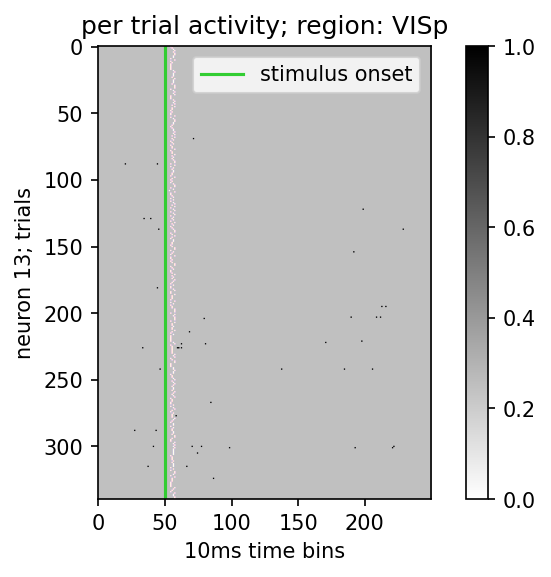

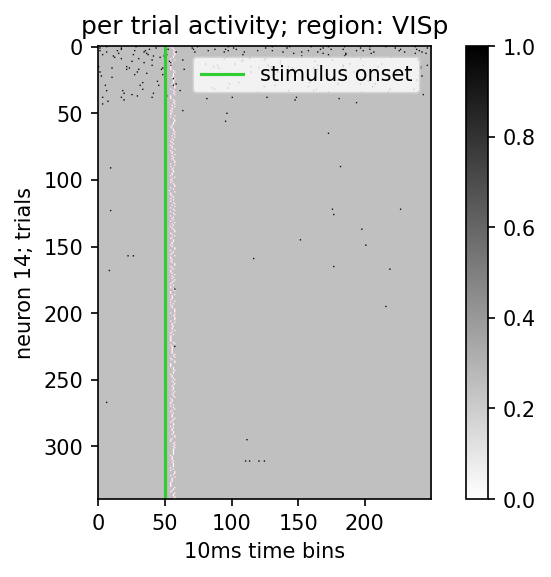

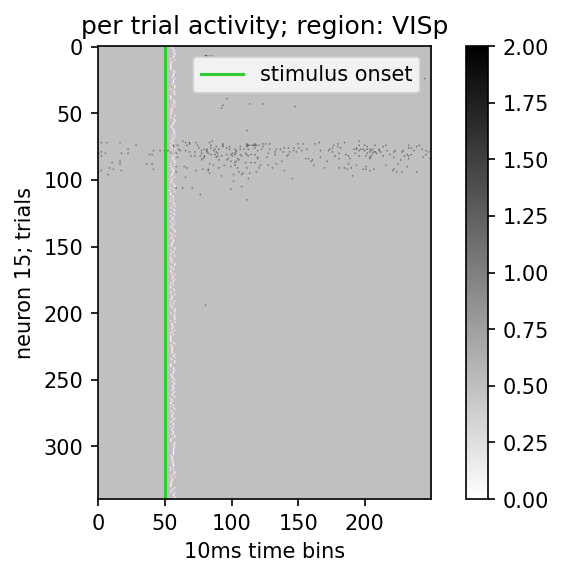

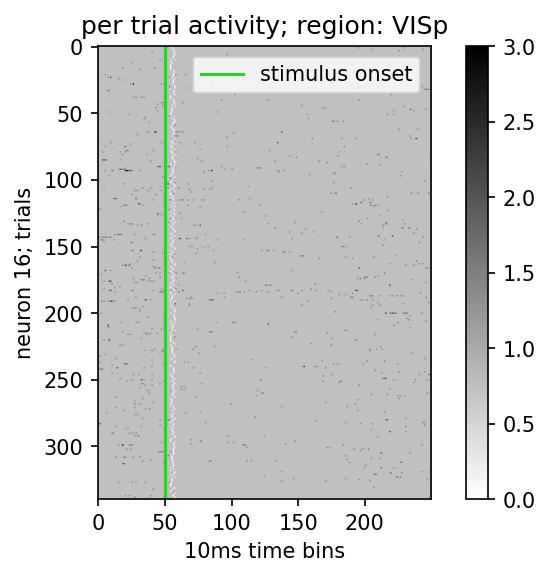

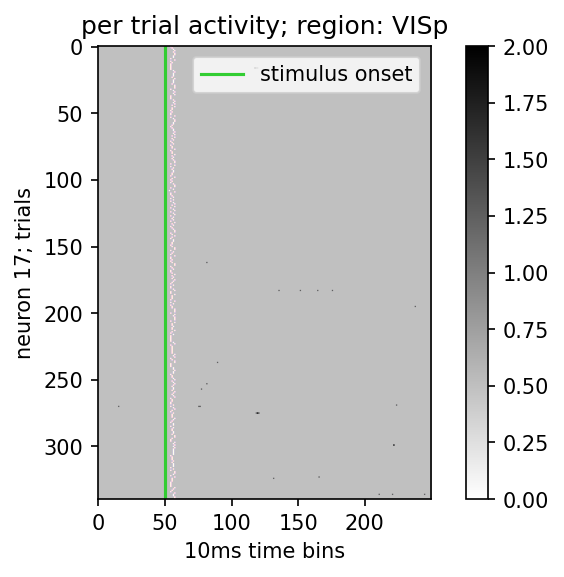

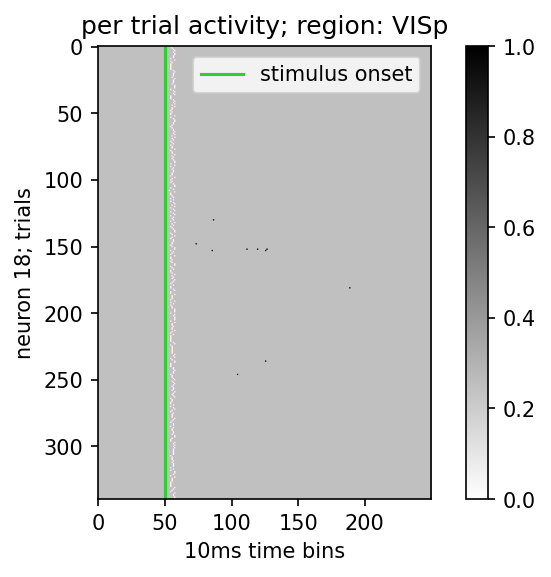

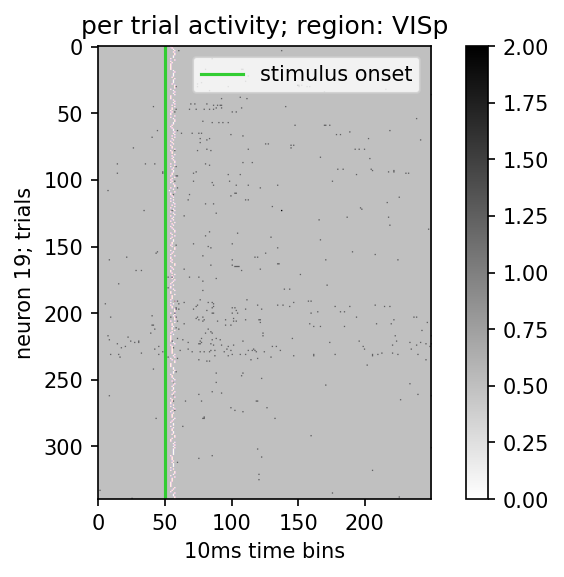

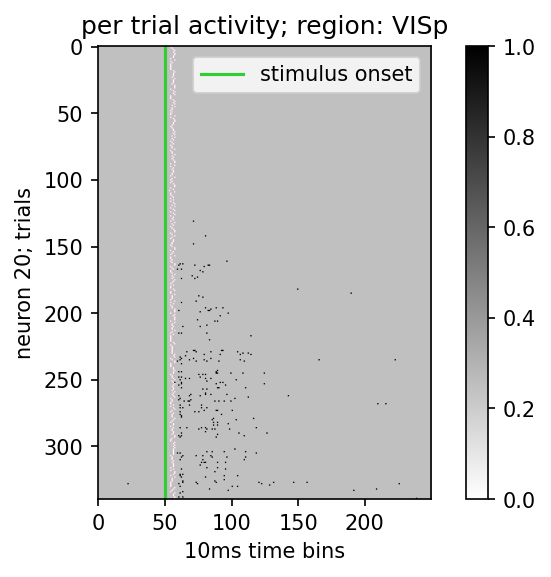

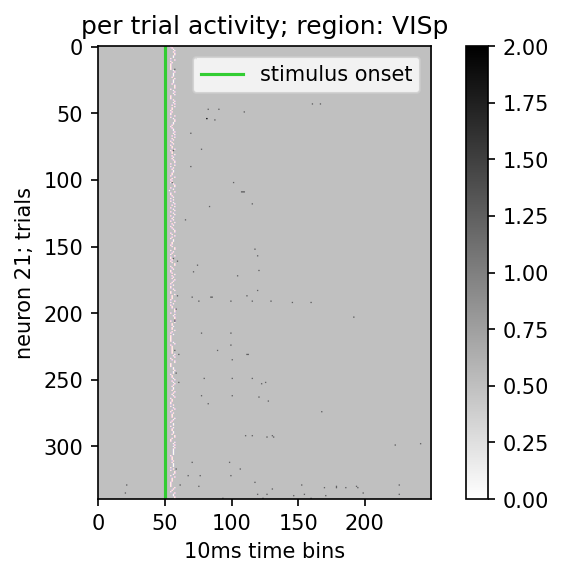

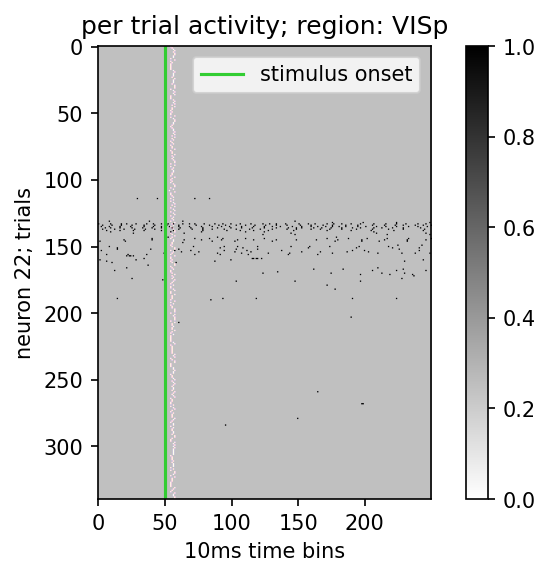

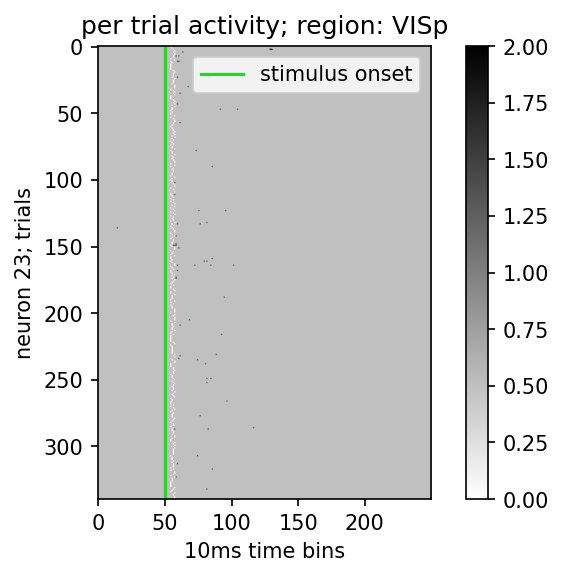

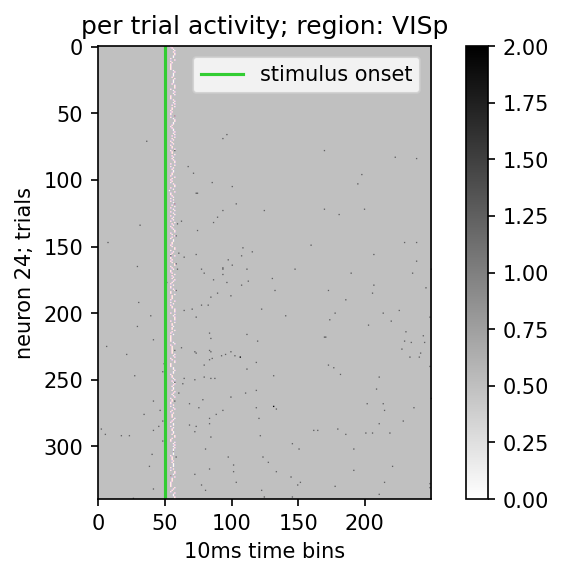

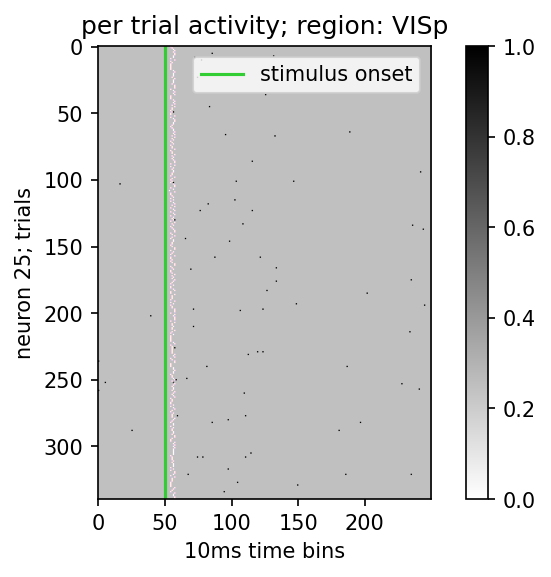

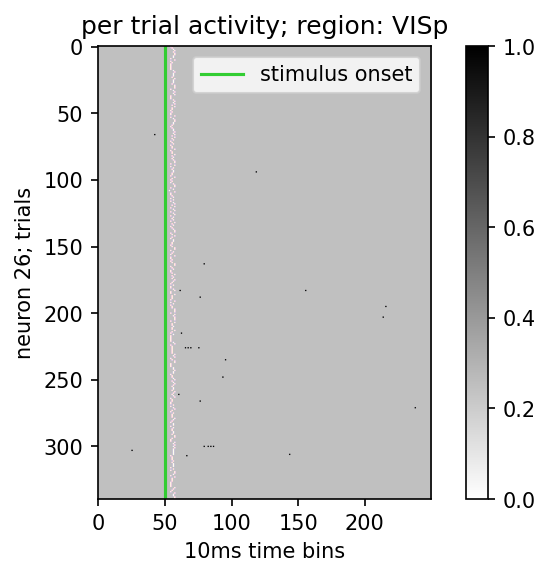

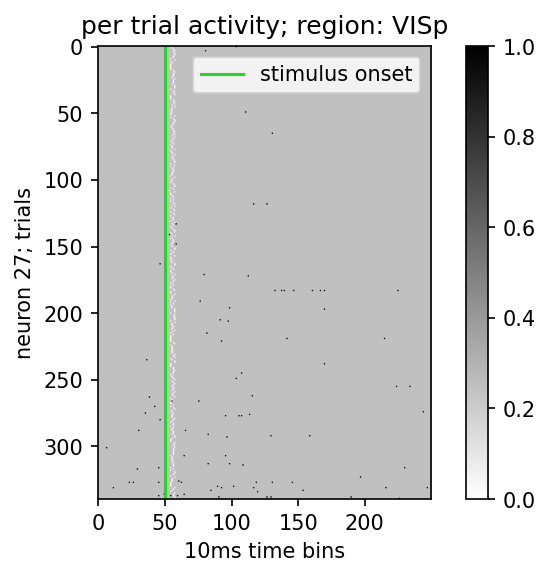

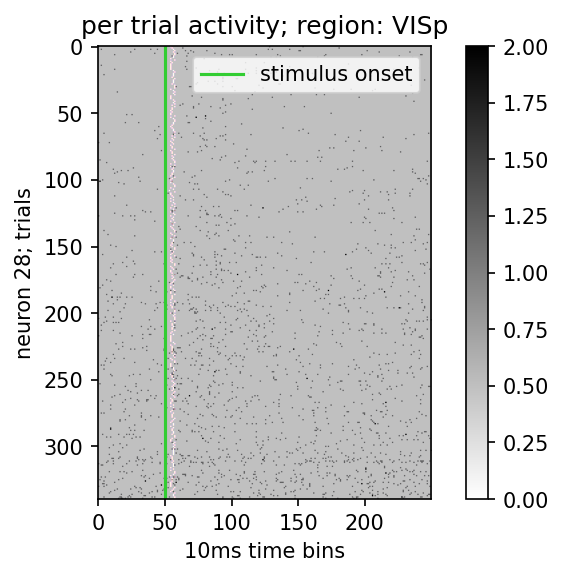

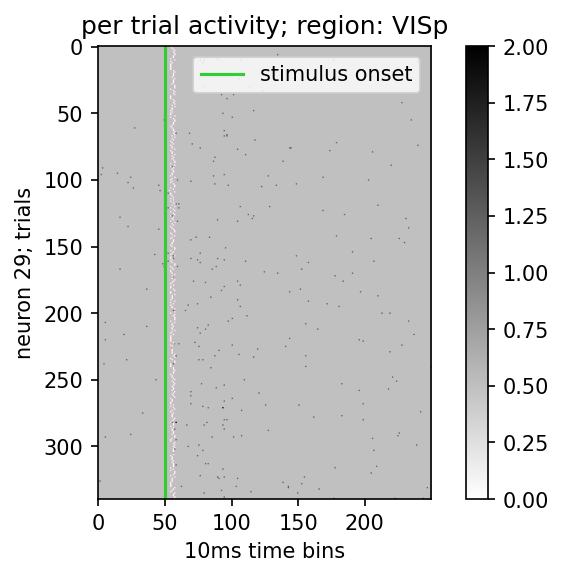

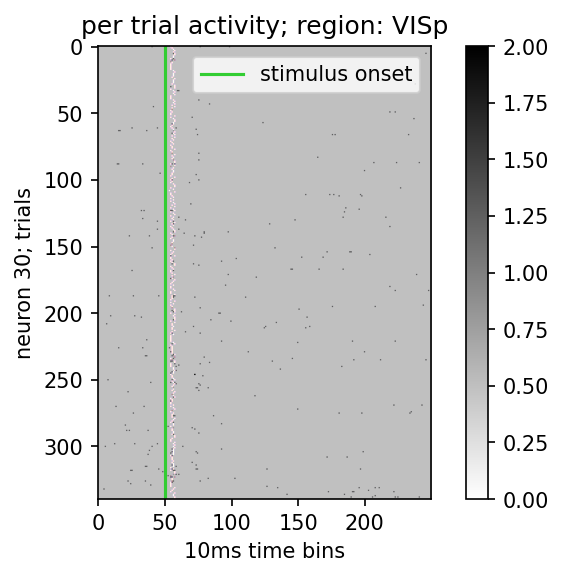

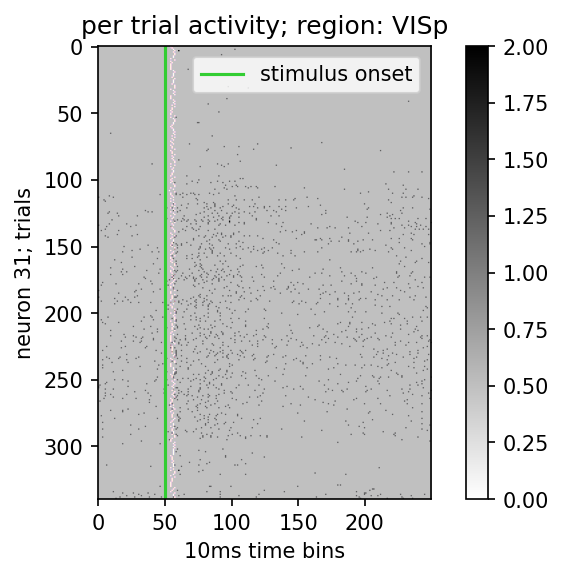

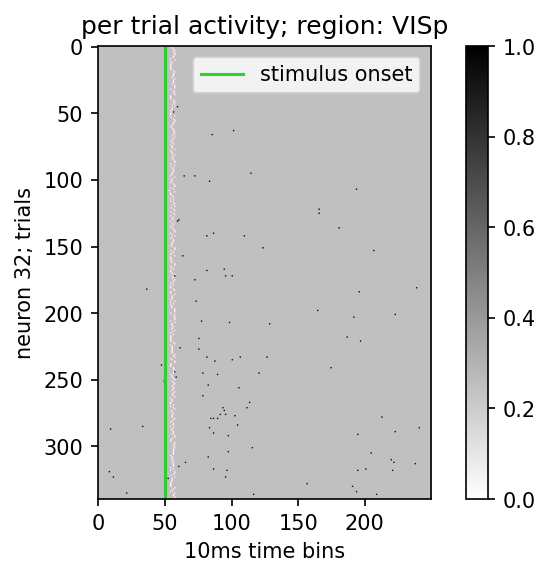

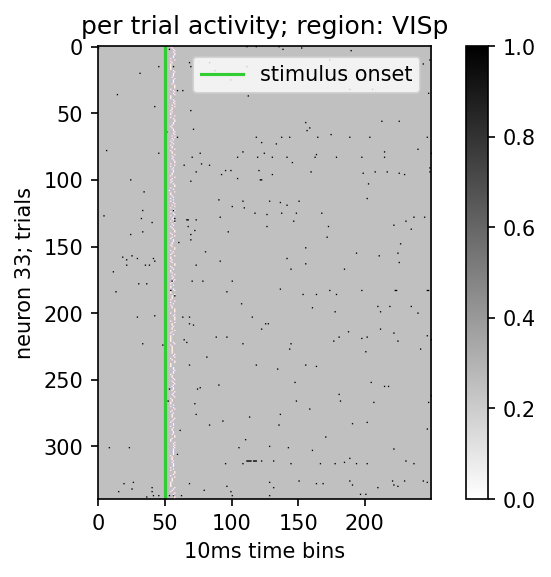

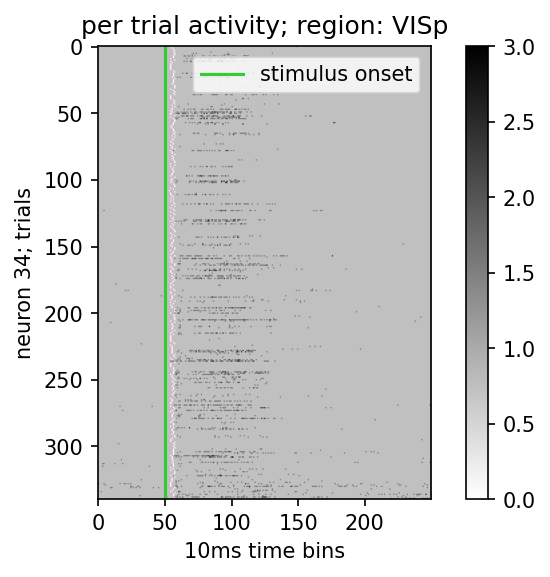

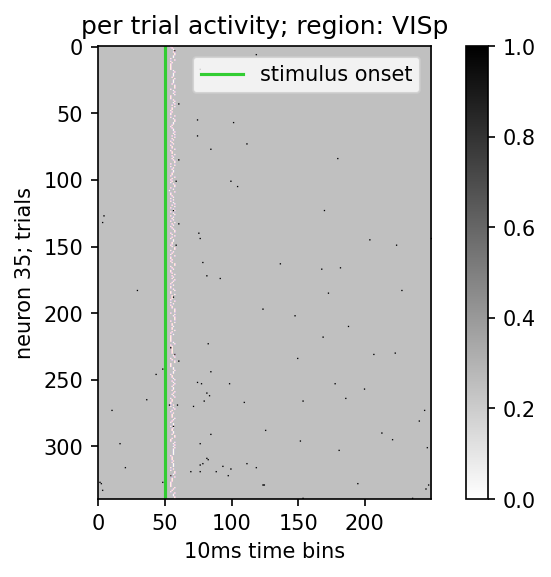

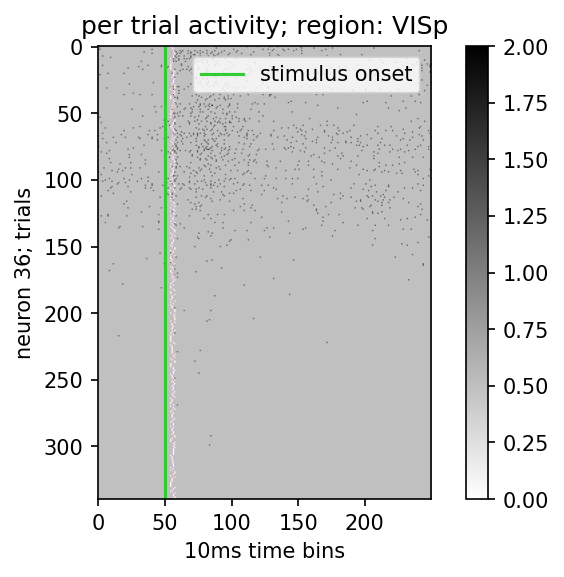

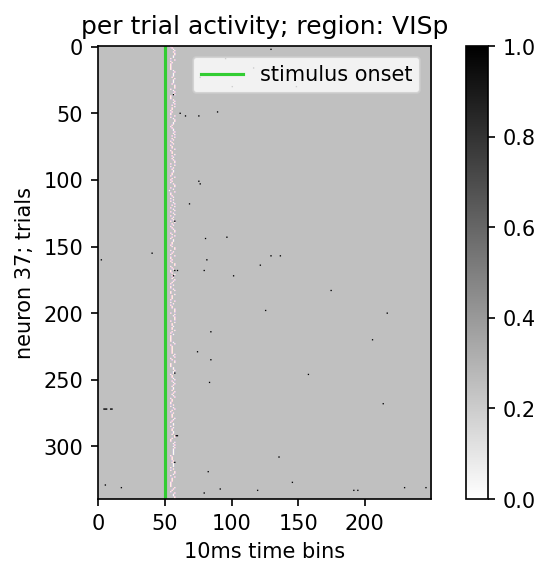

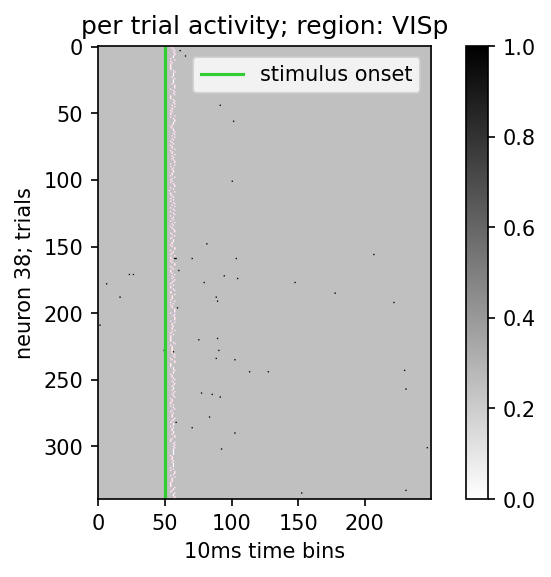

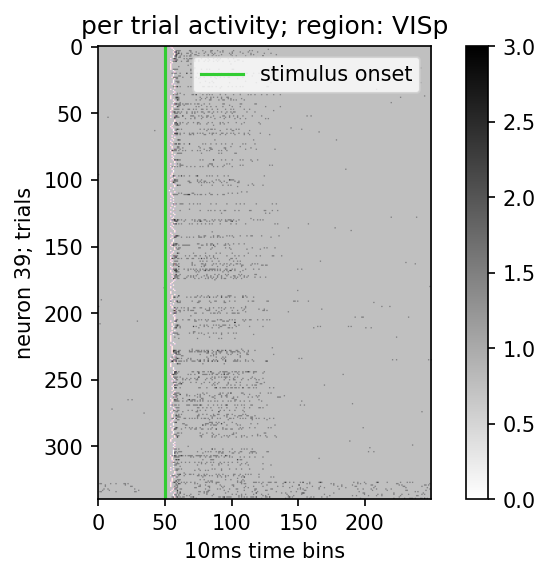

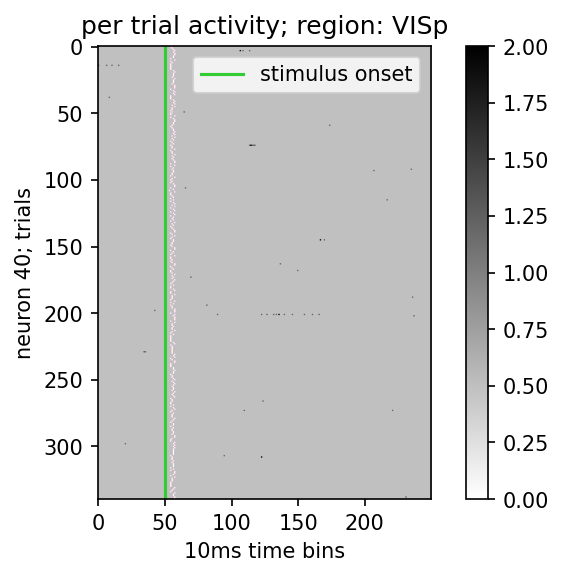

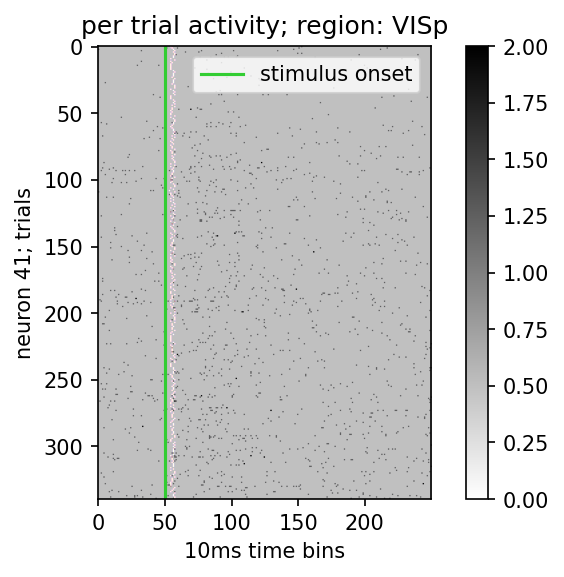

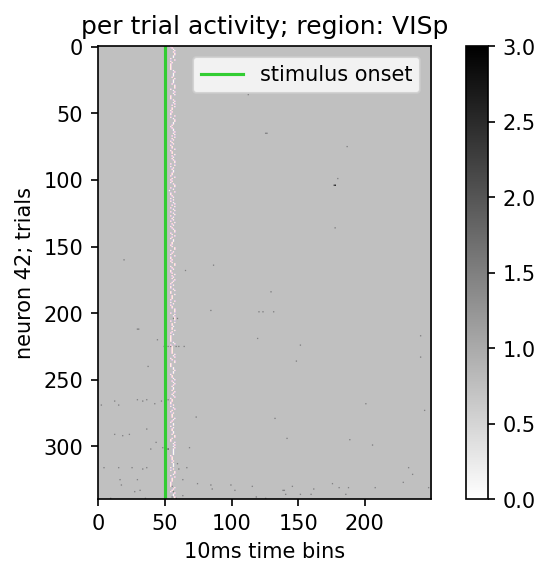

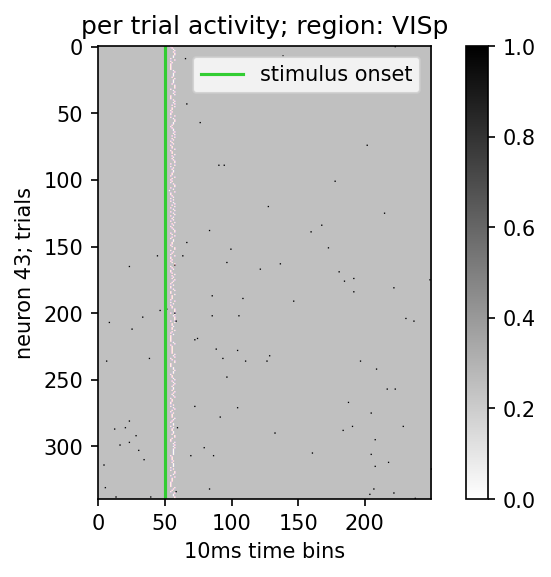

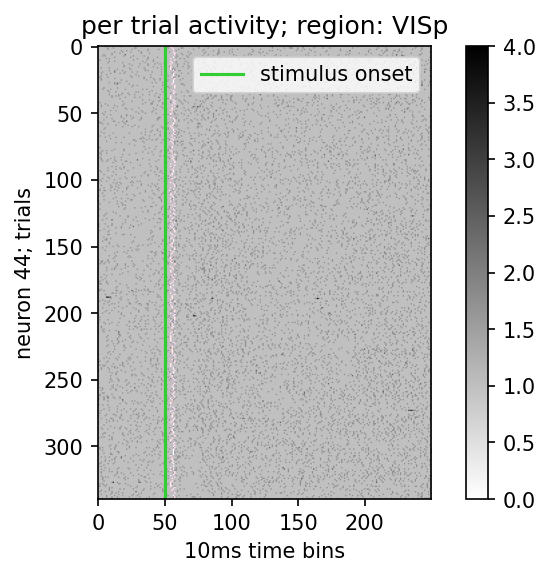

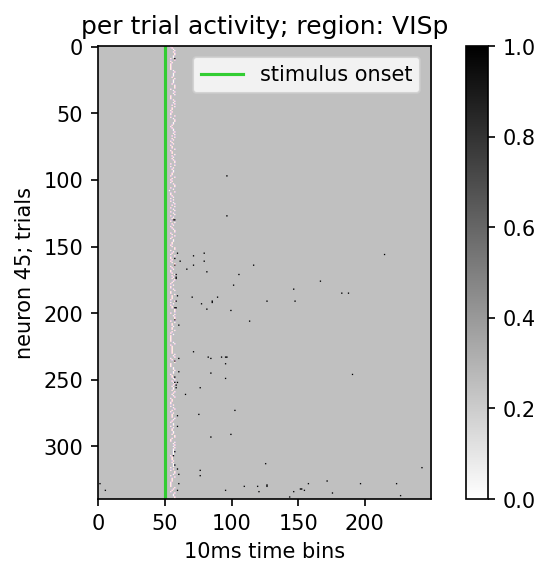

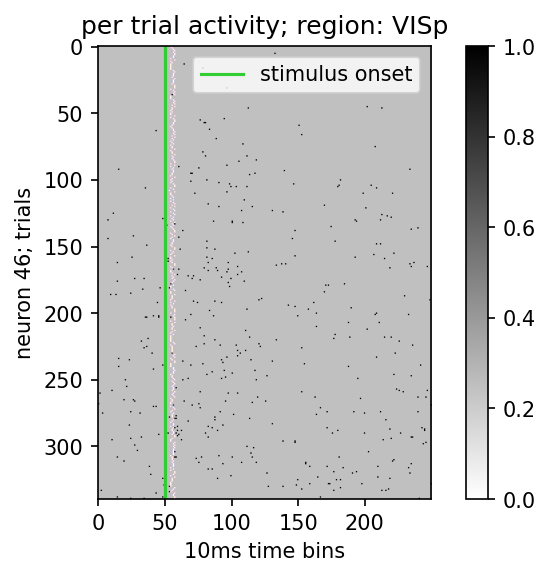

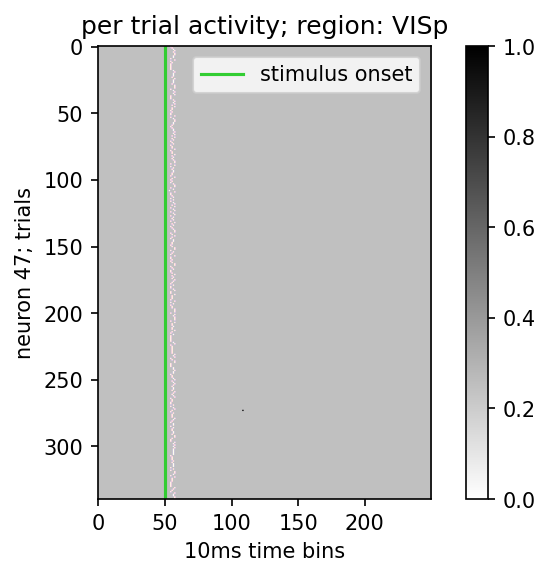

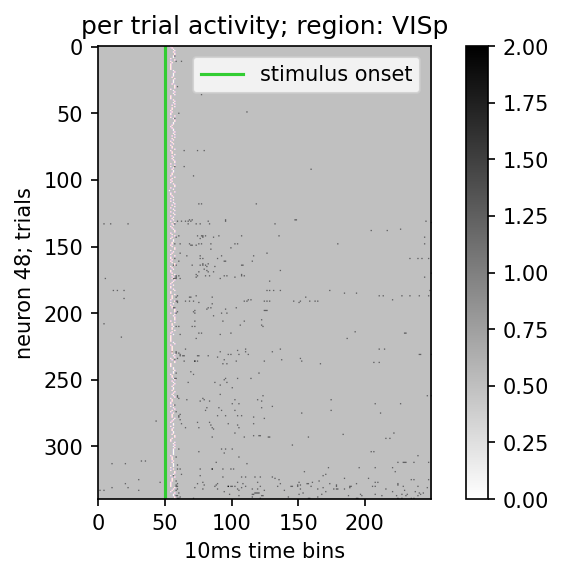

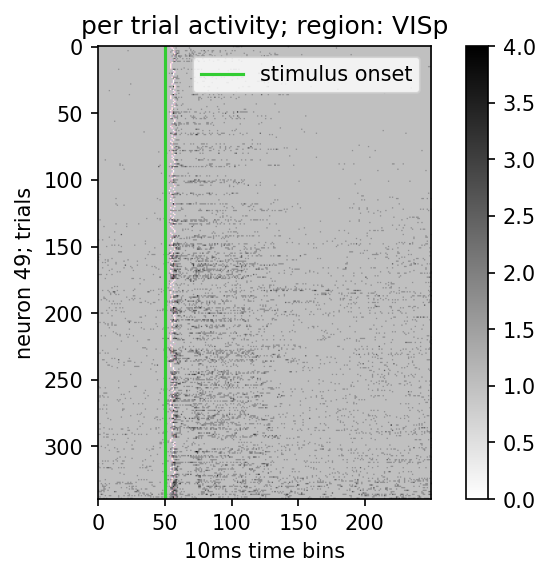

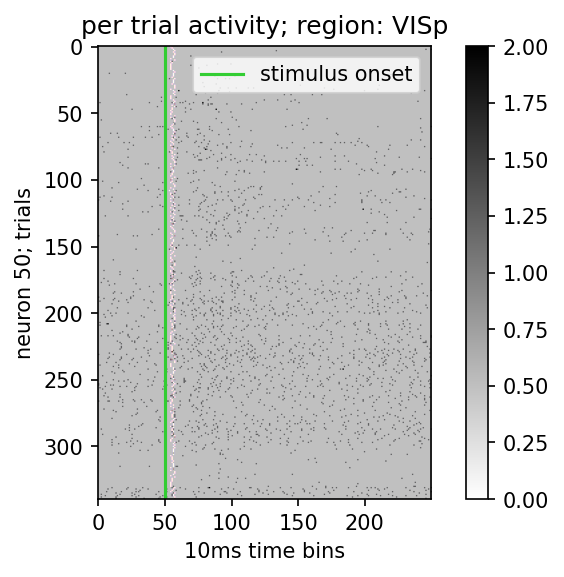

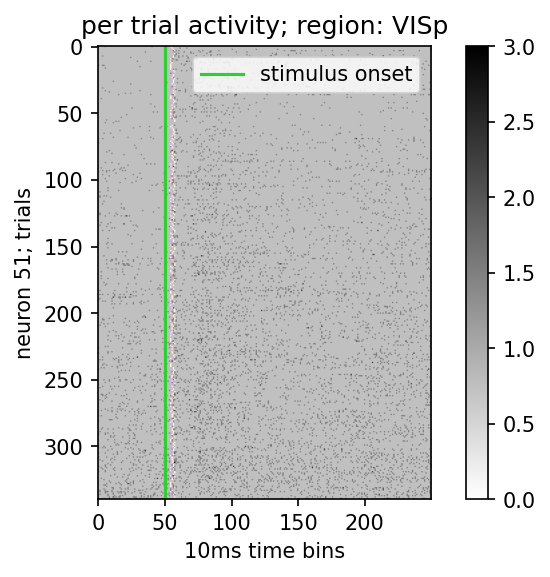

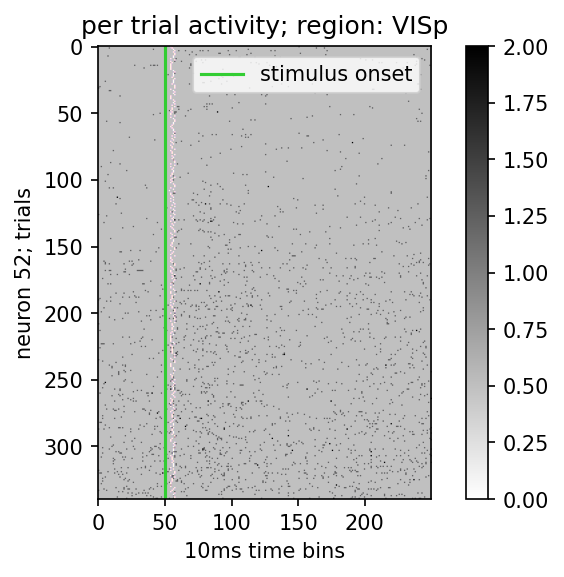

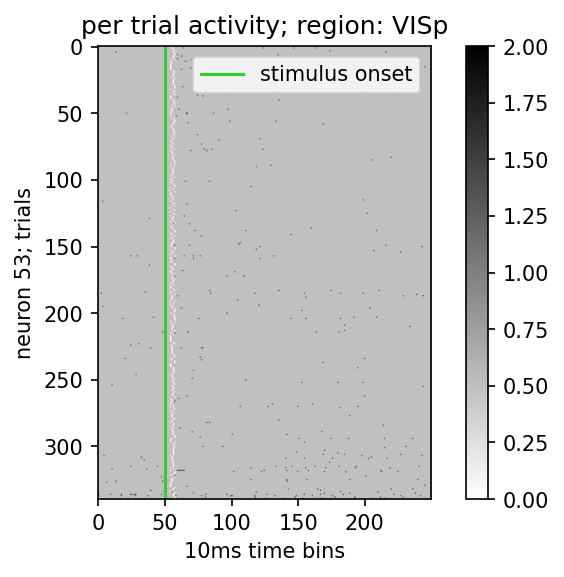

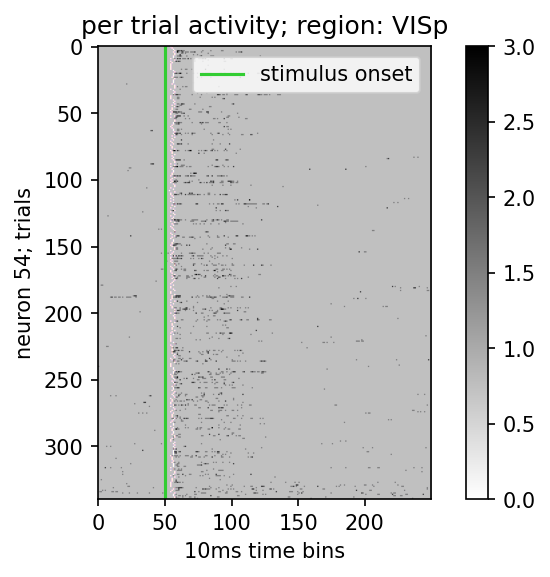

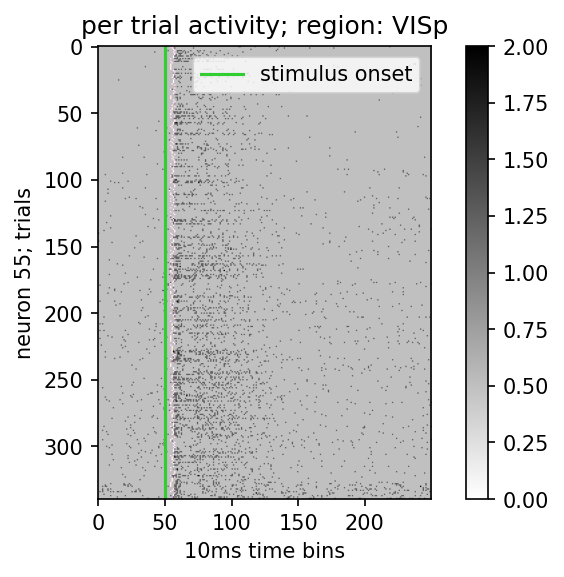

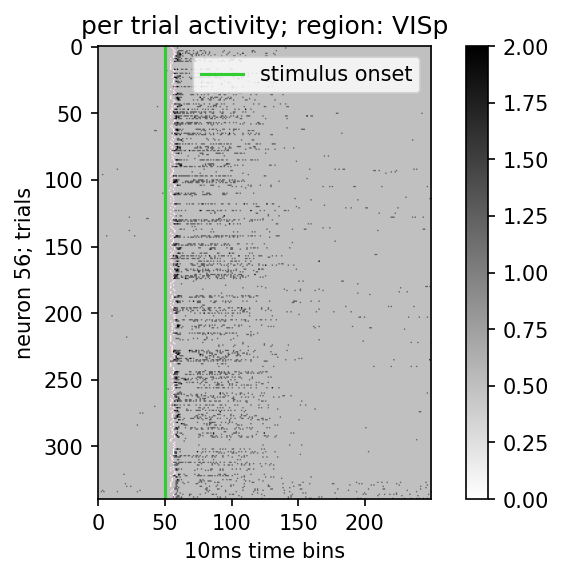

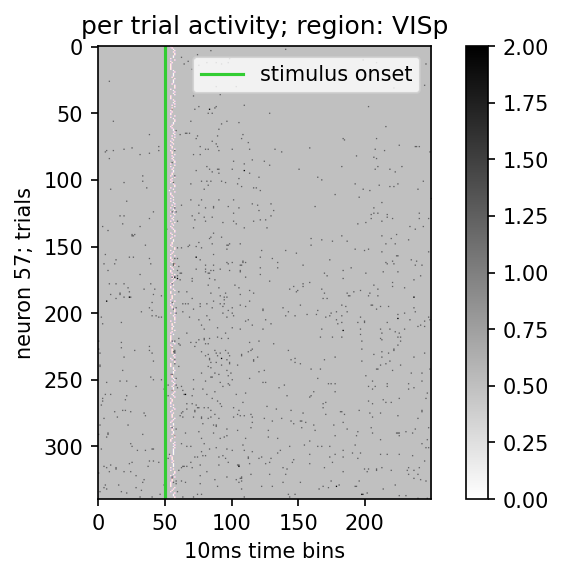

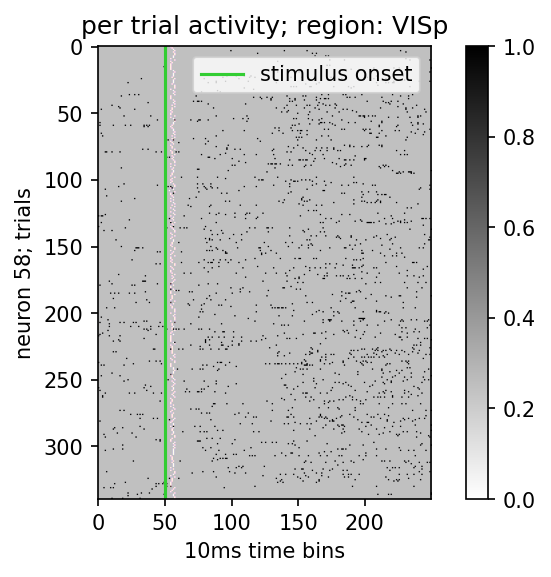

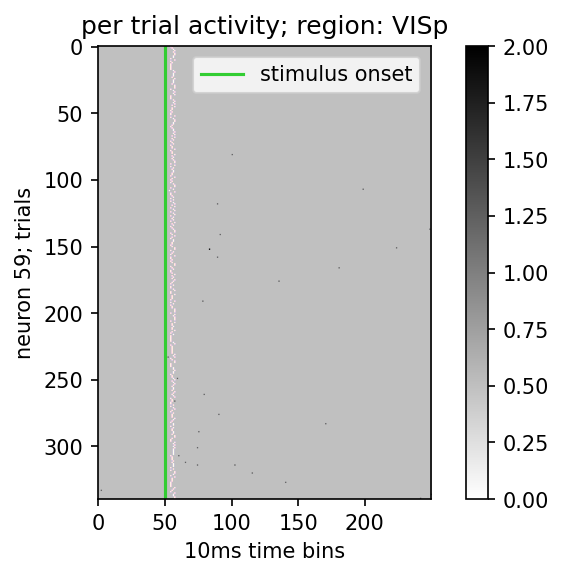

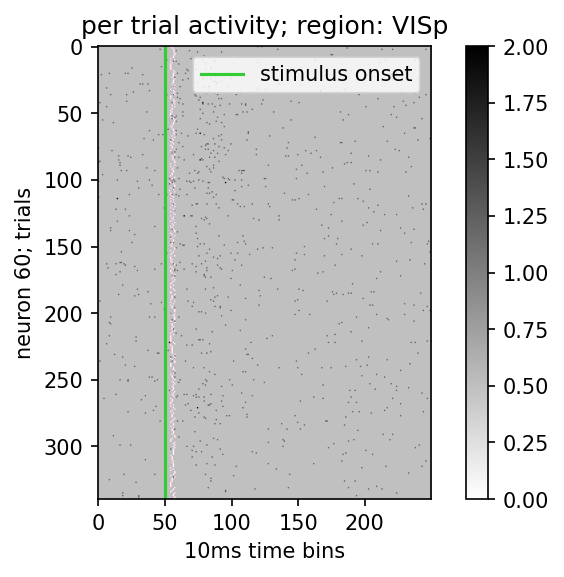

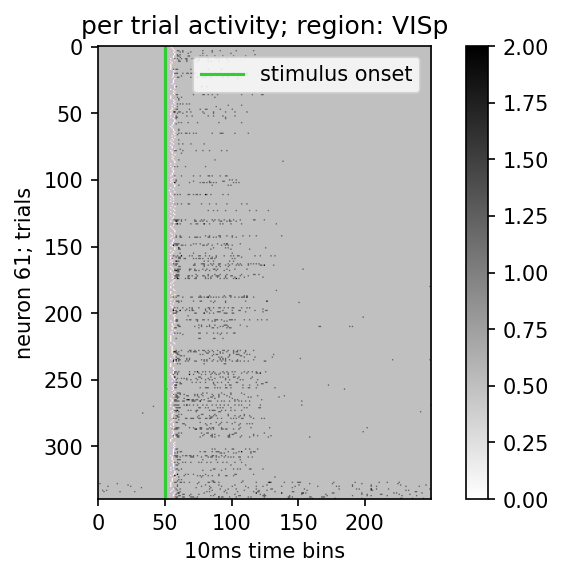

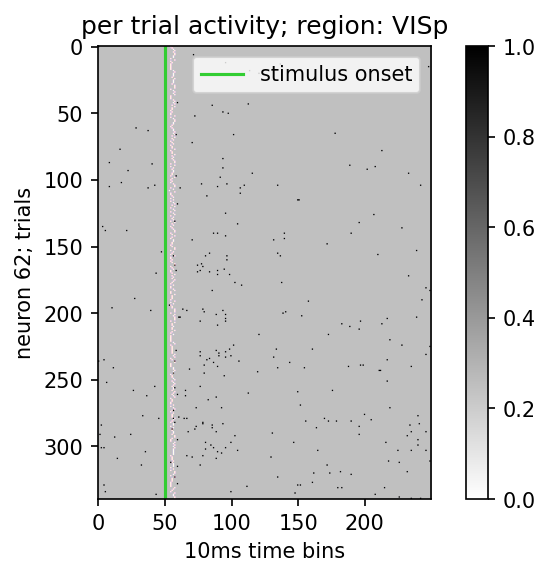

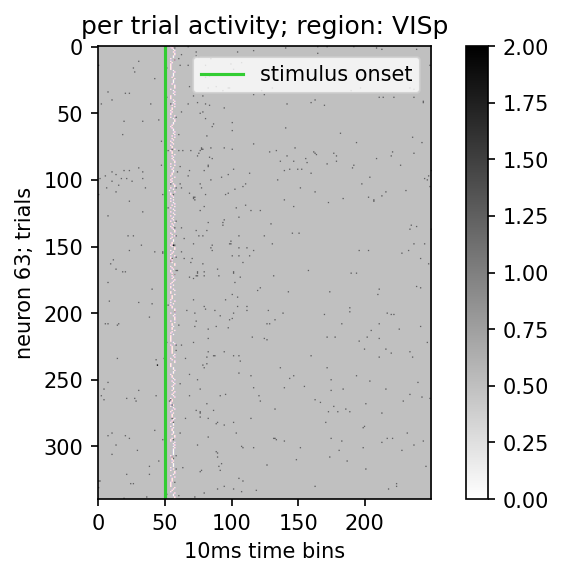

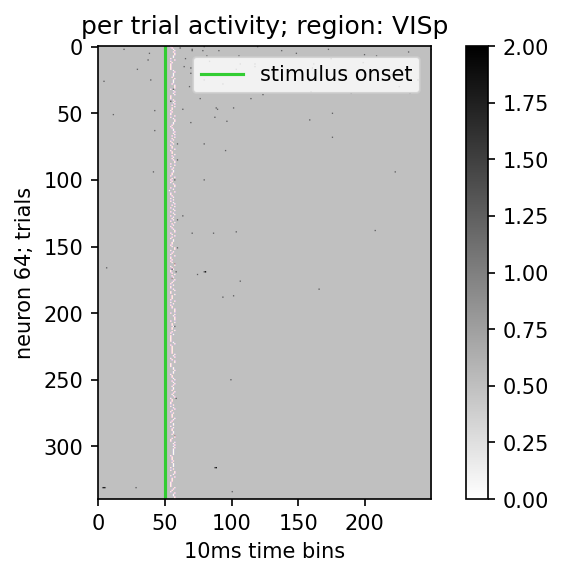

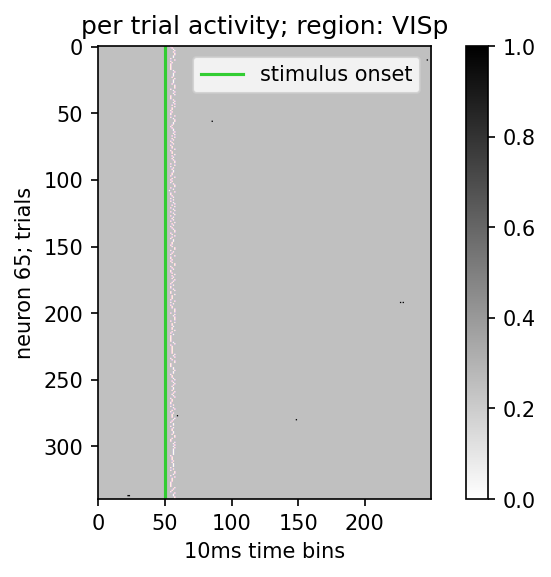

In [ ]:
# lets look at neuronal responses in one region
region = 'VISp'
neurons = dat['brain_area'] == region
neurons_spks = dat['spks'][neurons]
neurons_count = neurons_spks.shape[0]
total_neurons_count = dat['spks'].shape[0]
trials_count = dat['spks'].shape[1]
print(f"total neurons: {total_neurons_count}")
print(f"{region} neurons: {neurons_count}")
print(f"trials: {trials_count}")

# plot activity across trials for each neuron with gocue
gocue_times = get_times_for_neuron(neurons_spks, dat['gocue'])
# response_times = get_times_for_neuron(neurons_spks, dat['response_time'])
plot_per_trial_activity(neurons_spks, region, gocue=gocue_times, response_time=None)

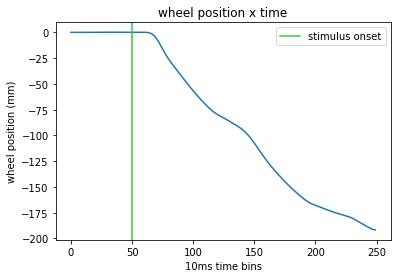

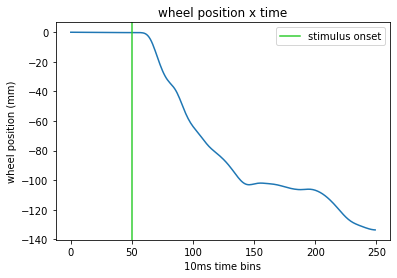

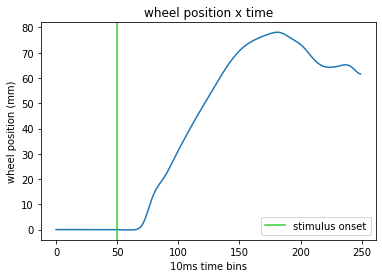

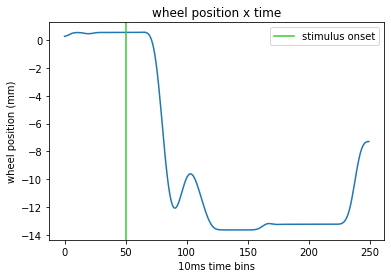

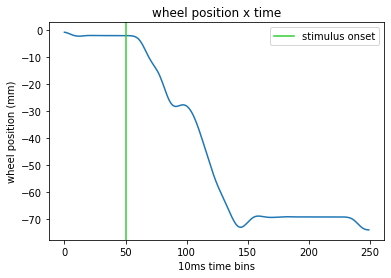

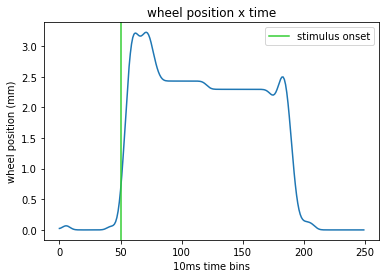

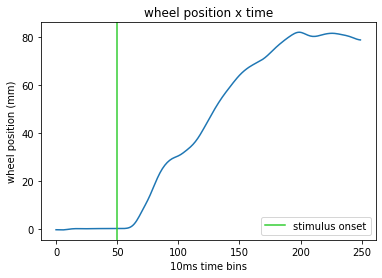

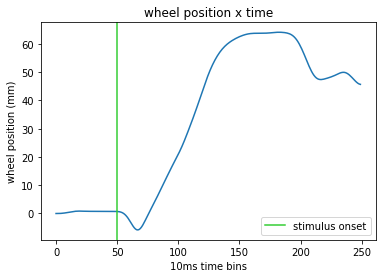

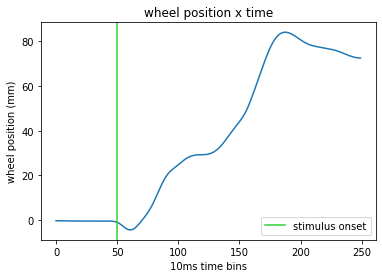

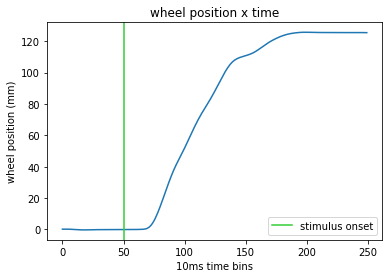

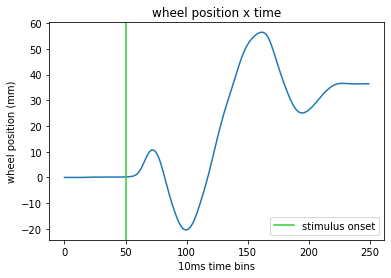

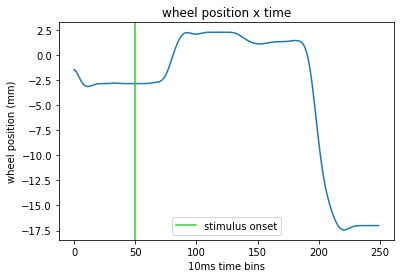

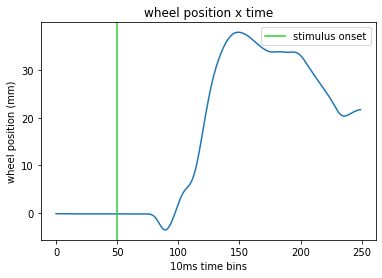

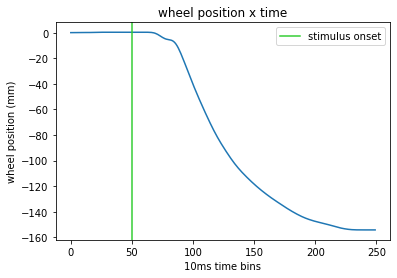

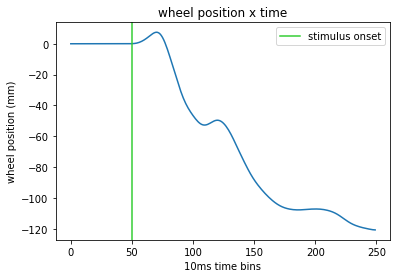

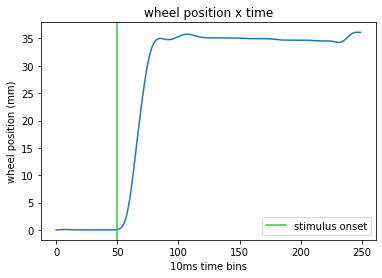

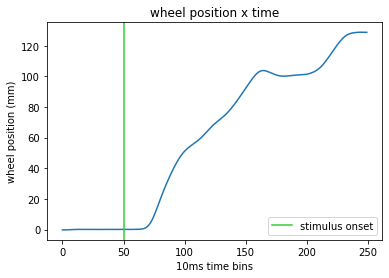

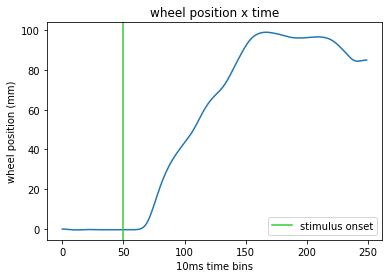

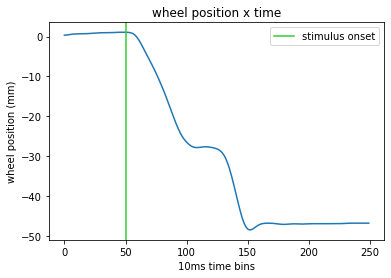

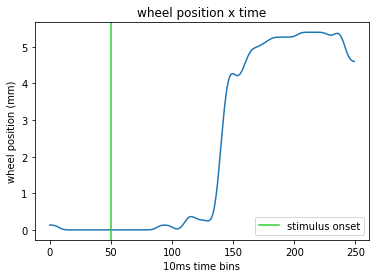

In [ ]:
# plot wheel position
dat = alldat[11]
wheel_act = dat['wheel'].squeeze()
for trial in wheel_act[10:30]:
   plot_wheel_movement(trial)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f61ff418-f78f-4b42-b416-d4f62a50c767' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>